In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
%matplotlib inline
import pandas as pd
import pylab
from matplotlib.mlab import PCA as mlabPCA


### Очистка данных

In [2]:
def clean_df(df, x=1, y=15): 
    #Чистим изначальный массив, берем определенное количество спикеров, по частоте их выступлений
    
    ind = df.Speaker.value_counts()[x:y].index # берем имена спикеров
        
    new_df=df[df.Speaker==ind[0]] # первый элемент дата фрейма 
    for i in range(1,len(ind)): # проходим по остальным элементам
        new_df=pd.concat([new_df,df[df.Speaker==ind[i]]]) # добавляем последующие подмассивы в основной

    return new_df # выводим

In [3]:
data = pd.read_csv('primary_debates_cleaned.csv')
df = clean_df(data)
train = df.Text.values

### Векторизация данных

In [4]:
count_vect = CountVectorizer() 
X_train_counts = count_vect.fit_transform(train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
vecs = X_train_tfidf

In [5]:
LE = LabelEncoder()
Y = df.Speaker.values
Y = LE.fit_transform(Y)
vecs = vecs.toarray()
X_train_counts = X_train_counts.toarray()

### Разложение с помощью МГК после векторизации до  tfidf_transformer

In [7]:
X_reduced = PCA(n_components=10).fit_transform(X_train_counts)
pca = PCA(n_components=10)
pca.fit(X_train_counts)

PCA(copy=True, n_components=10, whiten=False)

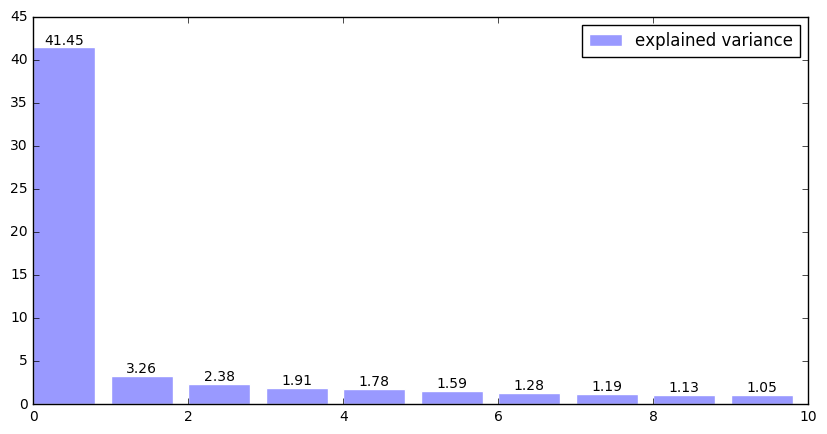

In [12]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(pca.explained_variance_)), pca.explained_variance_, facecolor='#9999ff', edgecolor='white',label="explained variance")
for x,y in zip(np.arange(len(pca.explained_variance_)),pca.explained_variance_):
    plt.text(x+0.4, y+0.0005, '%.2f' % y, ha='center', va= 'bottom')
plt.legend(loc='upper right')

[]

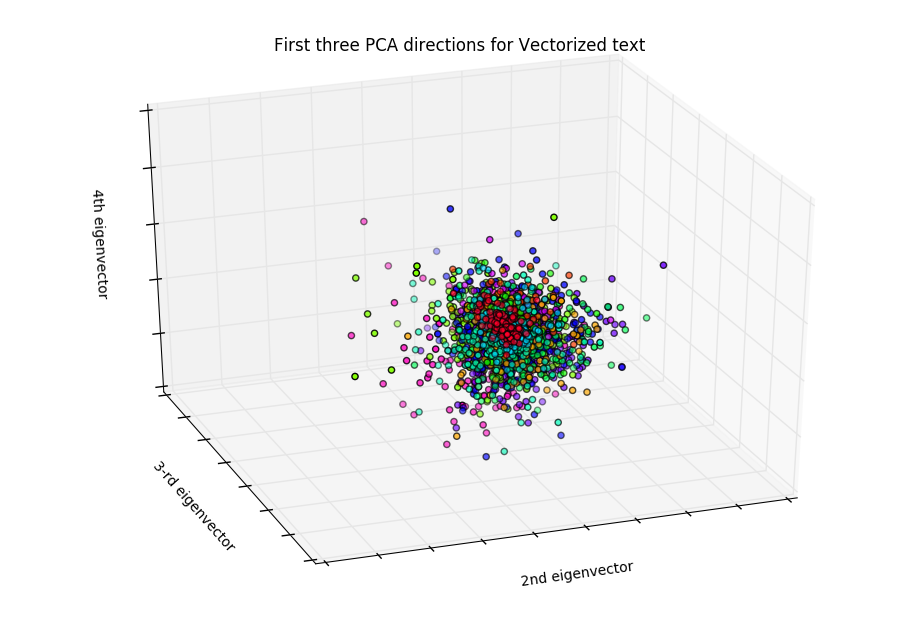

In [32]:
fig = plt.figure(10, figsize=(9, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 1], X_reduced[:, 2], X_reduced[:, 3],cmap="gist_rainbow",c=Y)
ax.set_title("First three PCA directions for Vectorized text")
ax.set_xlabel("2nd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("3-rd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("4th eigenvector")
ax.w_zaxis.set_ticklabels([])


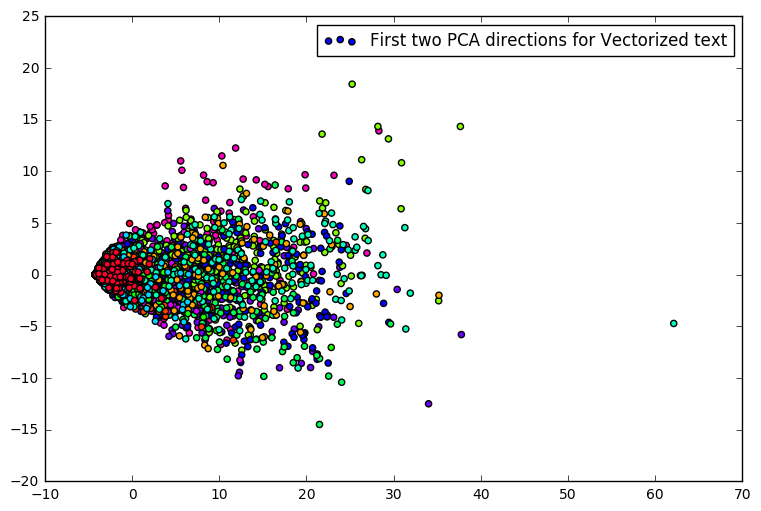

In [25]:
plt.figure(1, figsize=(9, 6))
pylab.scatter(X_reduced[:, 0], X_reduced[:, 1],cmap='gist_rainbow', c=Y,label="First two PCA directions for Vectorized text")

plt.legend(loc='upper right')
#cmap=plt.cm.Paired - отвечает за цветовую гамму

### Разложение в МГК после  tfidf_transformer

In [ ]:
X_reduced = PCA(n_components=10).fit_transform(vecs)
pca = PCA(n_components=10)
pca.fit(vecs)

In [ ]:
plt.bar(np.arange(len(pca.explained_variance_)), pca.explained_variance_, facecolor='#9999ff', edgecolor='white',label="explained variance")
for x,y in zip(np.arange(len(pca.explained_variance_)),pca.explained_variance_):
    plt.text(x+0.4, y+0.0005, '%.2f' % y, ha='center', va= 'bottom')
plt.legend(loc='upper right')

In [ ]:
fig = plt.figure(10, figsize=(9, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 1], X_reduced[:, 4], X_reduced[:, 3],cmap="gist_rainbow",c=Y)
ax.set_title("First three PCA directions for tfidf text")
ax.set_xlabel("5th eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("1st eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("4th eigenvector")
ax.w_zaxis.set_ticklabels([])

In [ ]:
plt.figure(1, figsize=(9, 6))
pylab.scatter(X_reduced[:, 0], X_reduced[:, 1],cmap=plt.cm.Paired, c=Y,label="First two PCA directions for tfidf text")
plt.legend(loc='upper right')

In [ ]:
fig = plt.figure(10, figsize=(9, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[1:100, 1], X_reduced[1:100, 2], X_reduced[1:100, 3],cmap=plt.cm.Paired)
